# Visual Optimization

This notebook aims at providing a visual understanding of the behaviour of two gradient-based optimizer (steepest descent and conjugate gradient) for linear systems of equations of the type:

$$\mathbf{d} = \mathbf{G} \mathbf{m}$$

where $\mathbf{G}$ is an $N \times N$ matrix. In this example we will use a toy N=2-dimensional problem.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scooby

from optutils import steepest_descent, conjgrad

Let's start by setting up the forward problem. 

We also compute the condition number of the operator $\mathbf{G}$ - note: the further the conditioning number from 1 the further the behaviour of the two solvers we will use in the following

In [2]:
m = np.array([0., 0.])
G = np.array([[2., 1.], [1., 5.]])

print('G condition number %f' % np.linalg.cond(G))

G condition number 3.124381


Let's define now the cost function to optimize:

$$ J = \frac{1}{2} \mathbf{m}^T \mathbf{G} \mathbf{m}^T + \mathbf{d}^T \mathbf{m}^T $$

In [3]:
m_min, m_max = (m[0] - 1.2, m[1] - 1.2), (m[0] + 1.2, m[1] + 1.2)
d = np.dot(G, m)

# cost function grid
nm1, nm2 = 51, 51
m1, m2 = np.mgrid[m_min[0]:m_max[1]:1j*nm1, m_min[1]:m_max[1]:1j*nm2]
mgrid = np.vstack((m1.ravel(), m2.ravel()))

m_min, m_max = (m[0] - 1.2, m[1] - 1.2), (m[0] + 1.2, m[1] + 1.2)
d = np.dot(G, m)

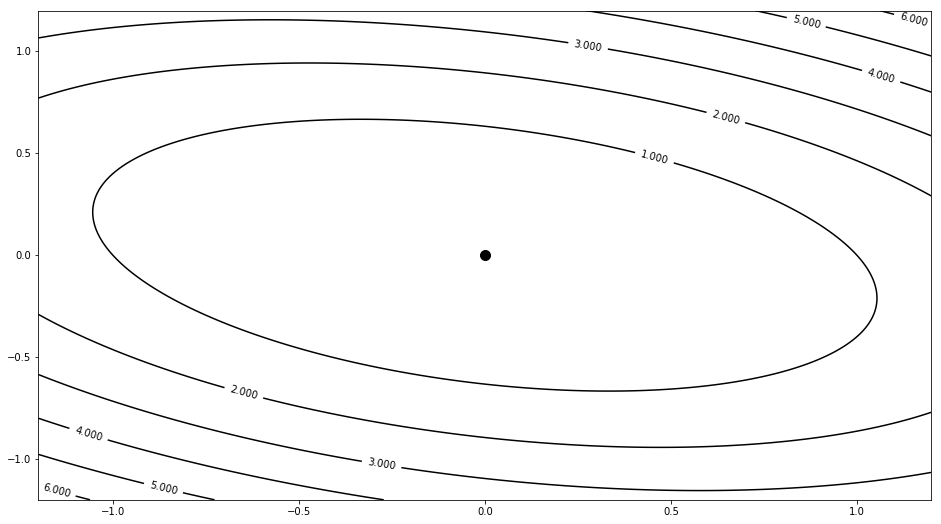

In [4]:
m_min, m_max = (m[0] - 1.2, m[1] - 1.2), (m[0] + 1.2, m[1] + 1.2)
d = np.dot(G, m)

# cost function grid
nm1, nm2 = 501, 501
m1, m2 = np.mgrid[m_min[0]:m_max[1]:1j*nm1, m_min[1]:m_max[1]:1j*nm2]
mgrid = np.vstack((m1.ravel(), m2.ravel()))

J = 0.5 * np.sum(mgrid * np.dot(G, mgrid), axis=0) + np.dot(mgrid.T, d[:, np.newaxis]).squeeze()
J = J.reshape(nm1, nm2)

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
cs = ax.contour(m1, m2, J, colors='k')
ax.clabel(cs, inline=1, fontsize=10);
ax.plot(m[0], m[1], '.k', ms=20);

At this point we compare the two solvers:
    
- Steepest descent:
    
    $$\mathbf{m}_{k+1} = \mathbf{m}_{k} + \alpha \frac{dJ}{d\mathbf{m}} $$
    
    where $\frac{dJ}{d\mathbf{m}} = \mathbf{r}$, $\alpha = \frac{\mathbf{r}^T \mathbf{r}}{\mathbf{r}^T \mathbf{G} \mathbf{r}}$ and  $\mathbf{r} = \mathbf{d} - \mathbf{G}\mathbf{m}$.
    
- Conjugate gradient:
    
    $$\alpha = \frac{\mathbf{r}_{k}^T \mathbf{r}_{k}}{\mathbf{d}_{k}^T \mathbf{G} \mathbf{d}_{k}} $$
    $$\mathbf{m}_{k+1} = \mathbf{m}_{k} + \alpha \mathbf{d}_{k} $$
    $$\mathbf{r}_{k+1} = \mathbf{r}_{k} - \alpha \mathbf{G} \mathbf{d}_{k} $$
    $$\beta = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_{k}^T \mathbf{r}_{k}}$$
    $$\mathbf{d}_{k+1} = \mathbf{r}_{k+1} + \beta \mathbf{d}_{k} $$
    
    where $\mathbf{d}_0 = \mathbf{r}_0 = \mathbf{d} - \mathbf{G}\mathbf{m}_0$.

Finally we display how the model changes through iterations for the two solvers

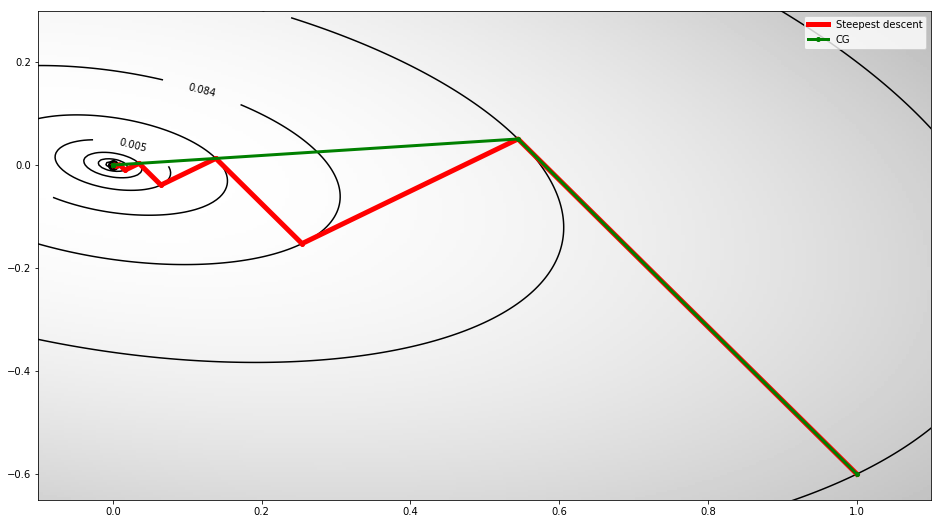

In [5]:
m0 = np.array([1, -0.6])
msd = steepest_descent(G, d, niter=10, m0=m0)
mcg = conjgrad(G, d, niter=10, m0=m0)

# cost function at 
Jsd = 0.5 * np.sum(msd.T * np.dot(G, msd.T), axis=0) + np.dot(msd, d[:, np.newaxis]).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
cs = ax.imshow(J.T, cmap='gray_r', origin='lower', extent=(m_min[0], m_max[0], m_min[1], m_max[1]))
cs = ax.contour(m1, m2, J, levels=np.sort(Jsd), colors='k')
ax.clabel(cs, inline=1, fontsize=10)
ax.plot(m[0], m[1], '.k', ms=20);
ax.plot(msd[:, 0], msd[:, 1], '.-r', lw=5, ms=8, label='Steepest descent')
ax.plot(mcg[:, 0], mcg[:, 1], '.-g', lw=3, ms=8, label='CG')
ax.legend();
ax.axis('tight')
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.65, 0.3]);

In [6]:
scooby.Report()

--------------------------------------------------------------------------------
  Date: Sun Jul 07 23:17:10 2019 CEST

            Darwin : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
            8.0 GB : RAM
           Jupyter : Environment

  Python 3.7.2 (default, Dec 29 2018, 00:00:04)  [Clang 4.0.1
  (tags/RELEASE_401/final)]

            1.15.4 : numpy
             1.2.1 : scipy
             7.2.0 : IPython
             3.0.2 : matplotlib
             0.4.1 : scooby
--------------------------------------------------------------------------------